In [1]:
# This is the code for the new set of data for Au NPs on WS2/Au foil. 
#I am aiming to establish how the nanoparticles behave as irradiation power increases

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import nplab.datafile as df
import scipy.signal as sig
import scipy.constants as const
import peakutils
import numpy as np
import datetime
from peakutils.plot import plot as pplot
from parula import cm_data
from matplotlib.colors import LinearSegmentedColormap 
from matplotlib.collections import LineCollection
import os
import Alexsdatafuncs
import matplotlib.cm as cm
import time
from sklearn.preprocessing import normalize
import matplotlib.cm as cm
colours = cm.viridis(np.linspace(0.25,0.75,5)) 

In [3]:
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
copper_map = LinearSegmentedColormap.from_list('copper', cm_data)
colours_1 = cm.viridis(np.linspace(0,1,500))
colours_2 = cm.hot(np.linspace(0,1,500))
Alex_data = Alexsdatafuncs.data_manipulators()
Alex_plot = Alexsdatafuncs.plotting_funcs()

In [17]:
data_f.close()

In [20]:
data_f = df.open_file(set_current = False)
fname = data_f.filename

C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/2019-03-06_271118_Ws2.h5


In [21]:
filelist = data_f['OceanOpticsSpectrometer']

In [22]:
ref = filelist.values()[0].attrs['reference']
bgd = filelist.values()[0].attrs['background']
wl = filelist.values()[0].attrs['wavelengths']

In [23]:
#Select data to deal with here
start_time_tot = datetime.datetime.strptime('2019-03-06T14:21:20.369000', 
                                        "%Y-%m-%dT%H:%M:%S.%f")
finish_time_tot = datetime.datetime.strptime('2019-03-06T18:45:51.972000', 
                                        "%Y-%m-%dT%H:%M:%S.%f")

In [70]:
#Create array to hold data with corresponding time value
all_data_w_time = []
all_data_w_time_n = []

#Iterate through data set and make array with data in one column and timestamp in the other
for data_set in filelist.values():
    
    t = datetime.datetime.strptime(
                        data_set.attrs['creation_timestamp'][:19], "%Y-%m-%dT%H:%M:%S")
    
    n = data_set.name[25:]
    
                     
    data = (data_set.value - bgd)/(ref - bgd)
    
    if t >= start_time_tot and t <= finish_time_tot: #Make sure you choose the right start and finish time

        s = (t-datetime.datetime(1970,1,1)).total_seconds()

        data_w_time = np.append(data, s)
        all_data_w_time.append(data_w_time)
    
#Sort all the data vs timestamp   
all_data_w_time_sorted = sorted(all_data_w_time,key=lambda x: x[-1])
all_data = np.delete(all_data_w_time_sorted, -1,1) #Delete the timestamp column of data

#Filter the data to help define peaks
all_data_filtered = []
for i in range(0, len(all_data)):
    filt_data = sig.savgol_filter(all_data[i],23,1)
    all_data_filtered.append(filt_data)
    


In [79]:
all_data_norm = []
for i in range(0, len(all_data)):
    inf_norm = np.linalg.norm(all_data_filtered[i][155:810], axis=0, ord = np.inf)
    all_data_norm.append(all_data_filtered[i][155:810]/inf_norm)

wl_norm = wl[155:810]

(-0.1, 2)

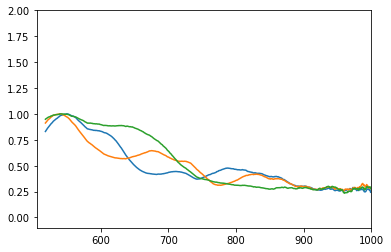

In [522]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(wl_norm, all_data_norm[371])
ax.plot(wl_norm, all_data_norm[372])
ax.plot(wl_norm, all_data_norm[393])

#ax.plot(wl_norm, all_data_norm[65])
#ax.plot(wl_norm, all_data_norm[373] - all_data_norm[75])

ax.set_xlim(505, 1000)
ax.set_ylim(-0.1, 2)

In [566]:
NPDF_1 = all_data_norm[370:393][::2]
NPPL_1 = all_data_norm[373:393][::2] - all_data_norm[75]
NPDF_2 = all_data_norm[27:48][::2]
NPPL_2 = all_data_norm[28:48][::2]# - all_data_norm[75]
NPDF_2 = np.append(NPDF_2, all_data_norm[50:94][::2], axis = 0)
NPPL_2 = np.append(NPPL_2, all_data_norm[49:93][::2], axis = 0)

NPDF_3 = all_data_norm[113:133]
NPDF_4 = all_data_norm[132:140]
NPDF_5 = all_data_norm[143:156]
NPDF_6 = all_data_norm[156:168]
NPDF_7 = all_data_norm[167:180]

NPDF_8 = all_data_norm[181:212][::2]

NPDF_9 = all_data_norm[372:394][::2]
NPDF_9 = np.append(NPDF_9, all_data_norm[395:401][::2], axis = 0)
NPPL_9 = all_data_norm[373:391][::2]
NPPL_9 = np.append(NPPL_9, all_data_norm[396:401][::2], axis = 0)
NPPL_9 = NPPL_9 - all_data_norm[75]



In [567]:
for i in range(len(NPDF_2)):
    NPDF_2[i] = NPDF_2[i] - 0.5

for i in range(len(NPDF_3)):
    NPDF_3[i] = NPDF_3[i] - 0.4
    
for i in range(len(NPDF_4)):
    NPDF_4[i] = NPDF_4[i] - 0.5
    
for i in range(len(NPDF_5)):
    NPDF_5[i] = NPDF_5[i] - 0.5
    
for i in range(len(NPDF_6)):
    NPDF_6[i] = NPDF_6[i] - 0.4
    
for i in range(len(NPDF_7)):
    NPDF_7[i] = NPDF_7[i] - 0.4
    
for i in range(len(NPDF_8)):
    NPDF_8[i] = NPDF_8[i] - 0.3
    
for i in range(len(NPDF_9)):
    NPDF_9[i] = NPDF_9[i] - 0.2

NPDF_2 = np.delete(NPDF_2, 10, axis = 0)
NPPL_2 = np.delete(NPPL_2, 9, axis = 0)
NPDF_8 = np.delete(NPDF_8, 11, axis = 0)
NPDF_9 = np.delete(NPDF_9, 10, axis = 0)

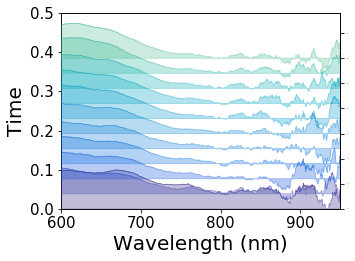

In [571]:
#Plot the raw data
#This factor defines the offset between each spectrum in the graph
mega_fact = 0.12
#This calls the function which adds the offset
all_data_norm_os = Alex_plot.offset_spectra(NPPL_9, mega_fact)

fig1 = plt.figure(1, figsize = (5,0.3*len(all_data_norm_os)))
ax1 = fig1.add_subplot(111)
ax1b = ax1.twinx()

colours = parula_map(np.linspace(0,0.6,len(all_data_norm_os)))
for i in range(0, len(all_data_norm_os)-1):
    lwidths = (all_data_norm_os[i] - i*mega_fact)*2
    points = np.array([wl_norm , all_data_norm_os[i]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis = 1)
    lc_2 = LineCollection(segments, linewidths = lwidths, color = colours[i])
    ax1b.add_collection(lc_2)
    spec1 = np.array(all_data_norm_os[i], dtype = float)
#     spec2 = np.array(len(all_data_w_time_sorted_offset_n[i])*[i], dtype = float)
    spec2 = np.ones(len(wl_norm))*i*mega_fact
    ax1b.fill_between(wl_norm, spec1, spec2, color = colours[i], 
                alpha = 0.3, zorder = 3)
    #Add in scatter spectra with peak wavelengths
    #ax1b.scatter(peak_wls_norm_1[i], peak_ints_norm_1[i] + i*mega_fact, color = "black", marker = "+" )

    
#ax1.axhline(1, 405, 1000, color = 'r', linewidth = 10)
ax1.set_xlim(600, 950)
ax1.set_xlabel("Wavelength (nm)", fontsize = 20)
ax1.set_ylabel("Time", fontsize = 20)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.set_ylim(0,0.5)
ax1b.set_ylim(0, (i+3)*mega_fact)
ax1b.tick_params(axis='y', labelsize=0)

fig1.savefig('C:/Users/alexc/OneDrive - University Of Cambridge/Documents/PhD Project/Projects/CVD WS2 grown on Au/060319 Experiment/100nm NP6 2mW vs time PL.png', bbox_inches='tight')
